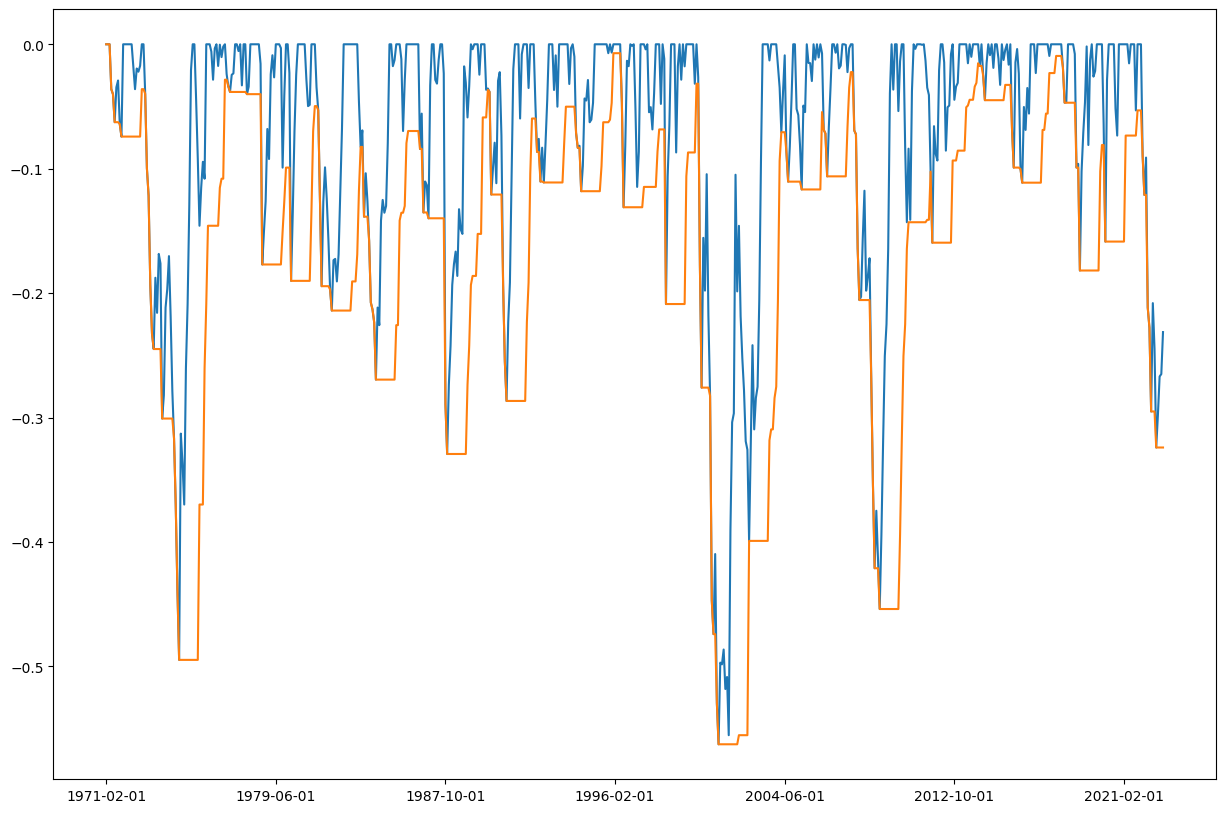

In [197]:
import pandas as pd
import pandas_datareader as  web
import matplotlib.pyplot as pp
import datetime

# Get SPY data for past several years
df = pd.read_csv('nasdaq.csv', sep = ",")
df = df[[" value"]]
# We are going to use a trailing 252 trading day window
window = 12
# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = df[' value'].rolling(window, min_periods=1).max()
Daily_Drawdown = df[' value']/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
# Plot the results
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
pp.show()

<AxesSubplot: >

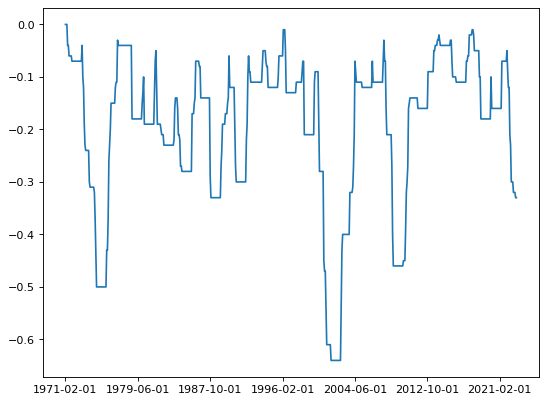

In [204]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

def max_drown(df, window = 14):
    Roll_Max = df[" value"].rolling(window, min_periods= 1).max()
    Daily_Drawdown = df[" value"]/Roll_Max -1
    Max_Daily_Drawdown = round(Daily_Drawdown.rolling(window, min_periods = 1).min(),2)
    
    return Max_Daily_Drawdown
max_drown(df).plot()

In [217]:
max_drown(df).mean()

-0.1901121794871795

In [213]:
import collections

a_list = max_drown(df)
occurrences = collections.Counter(a_list)
print(occurrences)

Counter({-0.11: 63, -0.12: 40, -0.04: 39, -0.07: 38, -0.16: 32, -0.18: 29, -0.14: 29, -0.21: 28, -0.19: 26, -0.28: 20, -0.3: 19, -0.09: 18, -0.23: 17, -0.13: 16, -0.05: 16, -0.33: 16, -0.06: 14, -0.5: 14, -0.64: 14, -0.46: 14, -0.1: 12, -0.4: 11, -0.15: 10, -0.32: 9, -0.31: 7, -0.03: 7, -0.27: 7, -0.24: 6, -0.17: 6, -0.61: 6, -0.02: 6, -0.08: 5, -0.01: 5, -0.45: 4, 0.0: 3, -0.43: 3, -0.22: 3, -0.37: 2, -0.2: 2, -0.47: 2, -0.54: 2, -0.44: 1, -0.26: 1, -0.29: 1, -0.39: 1})


In [216]:
dict(sorted(occurrences.items()))

{-0.64: 14,
 -0.61: 6,
 -0.54: 2,
 -0.5: 14,
 -0.47: 2,
 -0.46: 14,
 -0.45: 4,
 -0.44: 1,
 -0.43: 3,
 -0.4: 11,
 -0.39: 1,
 -0.37: 2,
 -0.33: 16,
 -0.32: 9,
 -0.31: 7,
 -0.3: 19,
 -0.29: 1,
 -0.28: 20,
 -0.27: 7,
 -0.26: 1,
 -0.24: 6,
 -0.23: 17,
 -0.22: 3,
 -0.21: 28,
 -0.2: 2,
 -0.19: 26,
 -0.18: 29,
 -0.17: 6,
 -0.16: 32,
 -0.15: 10,
 -0.14: 29,
 -0.13: 16,
 -0.12: 40,
 -0.11: 63,
 -0.1: 12,
 -0.09: 18,
 -0.08: 5,
 -0.07: 38,
 -0.06: 14,
 -0.05: 16,
 -0.04: 39,
 -0.03: 7,
 -0.02: 6,
 -0.01: 5,
 0.0: 3}